# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error
import matplotlib.pyplot as plt

# Load Dataset to DataFrame

In [5]:
df = pd.read_csv('diabetes.csv')

# Preview first 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Convert DataFrame to x (inputs), y (targets) arrays

In [6]:
input_columns = [col for col in df.columns if col != 'Outcome']
target_column = 'Outcome'

# x = df[input_columns].to_numpy()
# y = df[target_column].to_numpy()

# I didn't convert the data to numpy arrays in order to use x_test.index for Age Group accuracy comparison
x = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split Dataset to Train-Test

In [26]:
# Random states ensurs that we take the same data for test and training always,
# in order to conduct multiple tests and implementations for the same data
random_state = 0

# We select the 30% of the data to keep for testing, the 75% of the data are goiung to be used for training
test_ratio = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_ratio, random_state=random_state)

# Looking at the number of records used for training and testing
print(f'Train size: {len(x_train)}, Test size: {len(x_test)}')

Train size: 537, Test size: 231


# Create a Logistic Regression Model

In [27]:
# Create the classifier with a specific random state, in order to have the same output each time
classifier = LogisticRegression(max_iter=1000, random_state = 0)

# Train Model

In [28]:
# Train our classifier with the train sets
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

# Compute Diabetes Predictions

In [29]:
# Use out classifier to predict the values for the test set
y_pred = classifier.predict(x_test)

# Compute Model's Accuracy

In [30]:
# Compare the predicted valeus to the actual values of the test set
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7792207792207793

> Our model achieved a 78% accuracy

# -- Answer The Question: --
# Which model is better:


*   A model that mostly predicts that a patient has no Diabetes, even though they have
*   A model that mostly predicts that a patient has diabetes, even though they don't have





> Our model is better to have false positives, meaning that it's better to mostly predict that a patient has diabetes, even though they don't have. This way the patient will have the necessary check-ups and will figure out that the prediction was wrong.

> Wrongly predicting a patient with diabetes can be fatal



# Repeat same process for ages:



*   0-40
*   41-100



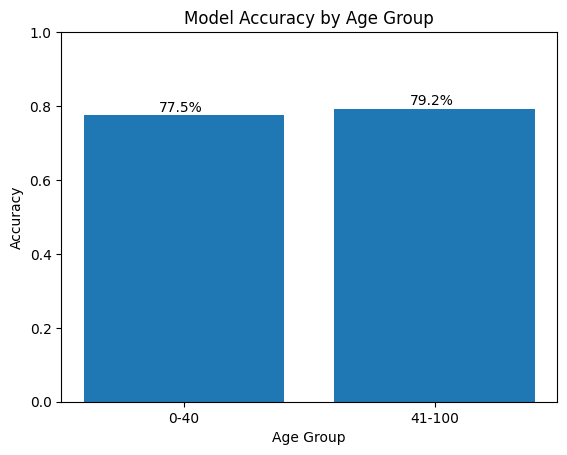

In [31]:
# Get the dataframe Indexes to select the appropriate rows for each age group
test_indices = x_test.index

# Select the predicted scores and actual scores for Ages 0-40 and calculate the accuracy
bin1_accuracy_score = accuracy_score(
    df.loc[test_indices , 'Outcome'][df.loc[test_indices, 'Age'] <= 40],
    y_pred[df.loc[test_indices, 'Age'] <= 40]
)

# Select the predicted scores and actual scores for Ages 41-100 and calculate the accuracy
bin2_accuracy_score = accuracy_score(
    df.loc[test_indices , 'Outcome'][df.loc[test_indices, 'Age'] > 40],
    y_pred[df.loc[test_indices, 'Age'] > 40]
)

# Create the visualization
plt.bar(['0-40', '41-100'] , [bin1_accuracy_score, bin2_accuracy_score])
plt.xlabel('Age Group')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Age Group')
plt.ylim(0,1)

plt.text(-0.1, bin1_accuracy_score + 0.01, f"{bin1_accuracy_score*100:.1f}%")
plt.text(0.9, bin2_accuracy_score + 0.01, f"{bin2_accuracy_score*100:.1f}%")

plt.show()

In [32]:
print("[Input Data] Ages 0-40: ", len(df[df['Age']<=40]))
print("[Input Data] Ages 41-100: ", len(df[df['Age']>40]))
print("---------------------------")
print("[Train Set Data] Ages 0-40: ", len(x_train[x_train['Age']<=40]))
print("[Train Set Data] Ages 41-100: ", len(x_train[x_train['Age']>40]))
print("---------------------------")
print("[Test Set Data] Ages 0-40: ", len(x_test[x_test['Age']<=40]))
print("[Test Set Data] Ages 41-100: ", len(x_test[x_test['Age']>40]))

[Input Data] Ages 0-40:  574
[Input Data] Ages 41-100:  194
---------------------------
[Train Set Data] Ages 0-40:  396
[Train Set Data] Ages 41-100:  141
---------------------------
[Test Set Data] Ages 0-40:  178
[Test Set Data] Ages 41-100:  53


> We seem similar accuracy scores for both age groups even though the first group has a lot more data available for training (396 vs 141)

# Try different Regularization parameters

In the following lines we can see the accuracy when changing the penalty parameters for our classifier

## L1

In [33]:
classifier_l1 = LogisticRegression(max_iter=1000, random_state = 0, penalty='l1', solver='liblinear')
classifier_l1.fit(x_train,y_train)
y_pred = classifier_l1.predict(x_test)
accuracy_l1 = accuracy_score(y_test, y_pred)
accuracy_l1

0.7835497835497836

## None

In [34]:
classifier_no_penalty = LogisticRegression(max_iter=1000, random_state = 0, penalty=None)
classifier_no_penalty.fit(x_train,y_train)
y_pred = classifier_no_penalty.predict(x_test)
accuracy_no_penalty = accuracy_score(y_test, y_pred)
accuracy_no_penalty

0.7792207792207793

## Comparison Chart


*l2 parameter is the default, we use the accuracy score from the model created in the previous cells*

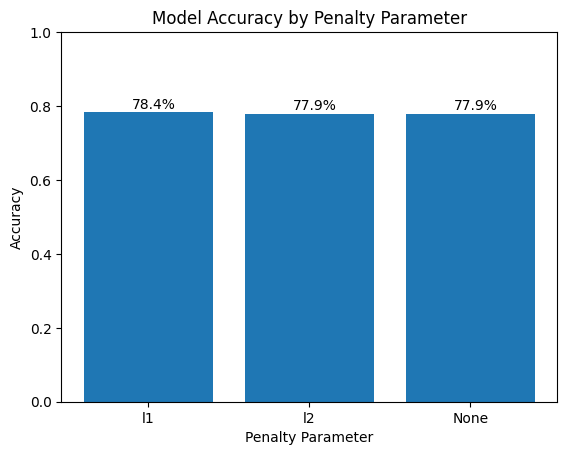

In [25]:
plt.bar(['l1', 'l2', 'None'] , [accuracy_l1, accuracy, accuracy_no_penalty])
plt.xlabel('Penalty Parameter')
plt.ylabel('Accuracy')
plt.title('Model Accuracy by Penalty Parameter')
plt.ylim(0,1)

plt.text(-0.1, accuracy_l1 + 0.01, f"{accuracy_l1*100:.1f}%")
plt.text(0.9, accuracy + 0.01, f"{accuracy*100:.1f}%")
plt.text(1.9, accuracy_no_penalty + 0.01, f"{accuracy_no_penalty*100:.1f}%")

plt.show()



> L1 has the highest accuracy score but for a very slight difference from the other two (0.5 p.p.)


# Ex2. Linear Regression

# Select Corresponding Features for this task

In [35]:
# We will use the three columns to predict the Blood Pressure
feauture_columns = ['Age','BMI','Pregnancies']
target_column = 'BloodPressure'

# Split Dataset to x, y

In [36]:
feautures = df[feauture_columns]
target = df[target_column]

# Split Dataset to Train-Test

In [38]:
# Define our parameters for the random state and split ratio of our data into train and test set
random_state = 0
test_ratio = 0.3

x_linear_train, x_linear_test, y_linear_train, y_linear_test = train_test_split(feautures, target, test_size = test_ratio, random_state=random_state)

# Compute BloodPressure Predictions

In [39]:
# Create our model and train it with our data
linear_model = LinearRegression()
linear_model.fit(x_linear_train,y_linear_train)

# Predict the Blood Pressure for the test set
y_linear_pred = linear_model.predict(x_linear_test)

# Measure MAE

In [40]:
# We use the mean absolute error score to define the accuracy
# It reflects the mean difference our predicted values have from the actual
mae = mean_absolute_error(y_linear_test, y_linear_pred)
mae

10.923279710580168

# Average Value and Standard Deviation

In [41]:
train_bp_mean = y_linear_train.mean()
train_bp_std = y_linear_train.std()
test_bp_mean = y_linear_test.mean()
test_bp_std = y_linear_test.std()

print('Average Value:')
print(f'Train Set: {train_bp_mean} | Test Set: {test_bp_mean}\n')
print('Standard Deviation:')
print(f'Train Set: {train_bp_std} | Test Set: {test_bp_std}')

Average Value:
Train Set: 69.66666666666667 | Test Set: 67.80086580086581

Standard Deviation:
Train Set: 19.46482348324358 | Test Set: 19.077968152094893


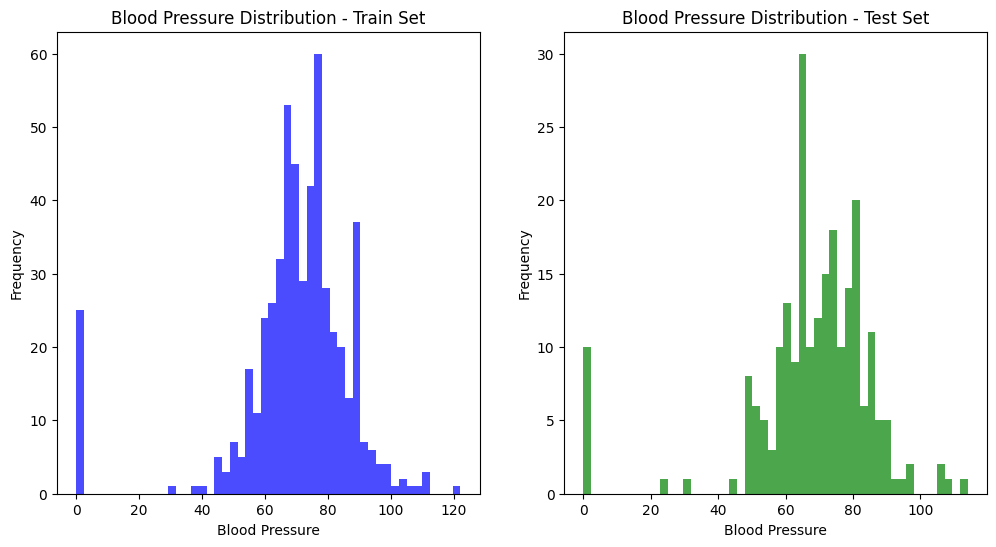

In [46]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.hist(y_linear_train, bins= 50, color='blue', alpha=0.7)
plt.title('Blood Pressure Distribution - Train Set')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(y_linear_test, bins= 50, color='green', alpha=0.7)
plt.title('Blood Pressure Distribution - Test Set')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')

plt.show()



> We use similar distributions for the Train and Test sets with train set having a more normal like distribution unline the test set that doesn't have a clear concentration around value 70


# Using Stochastic Gradient Descent (SGD)

In [47]:
sgd_model = SGDRegressor(loss='squared_error', penalty='l2', learning_rate='constant', eta0=0.01, tol=1e-3, random_state=random_state)
sgd_model.fit(x_linear_train,y_linear_train)

y_linear_pred_sgd = sgd_model.predict(x_linear_test)

mae_sgd = mean_absolute_error(y_linear_test, y_linear_pred_sgd)
mae_sgd

3714793244517.3906

## Using Different Penalty Parameters

In [48]:
sgd_model_l1 = SGDRegressor(loss='squared_error', penalty='l1', learning_rate='constant', eta0=0.01, tol=1e-3, random_state=random_state)
sgd_model_l1.fit(x_linear_train,y_linear_train)

y_linear_pred_sgd = sgd_model_l1.predict(x_linear_test)

mae_sgd_l1 = mean_absolute_error(y_linear_test, y_linear_pred_sgd)
mae_sgd_l1

7465925577113.516

In [49]:
sgd_model_elasticnet = SGDRegressor(loss='squared_error', penalty='elasticnet', learning_rate='constant', eta0=0.01, tol=1e-3, random_state=random_state)
sgd_model_elasticnet.fit(x_linear_train,y_linear_train)

y_linear_pred_sgd = sgd_model_elasticnet.predict(x_linear_test)

mae_sgd_elasticnet = mean_absolute_error(y_linear_test, y_linear_pred_sgd)
mae_sgd_elasticnet

14320399006720.775

In [50]:
sgd_model_none = SGDRegressor(loss='squared_error', penalty=None, learning_rate='constant', eta0=0.01, tol=1e-3, random_state=random_state)
sgd_model_none.fit(x_linear_train,y_linear_train)

y_linear_pred_sgd = sgd_model_none.predict(x_linear_test)

mae_sgd_none = mean_absolute_error(y_linear_test, y_linear_pred_sgd)
mae_sgd_none

19256283794345.633



> Stochastic Gradient Descent doesn't seem to be fit for our data. Feature processing might be needed



# Construct Scatter Plot for each Feature + Regression Line

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


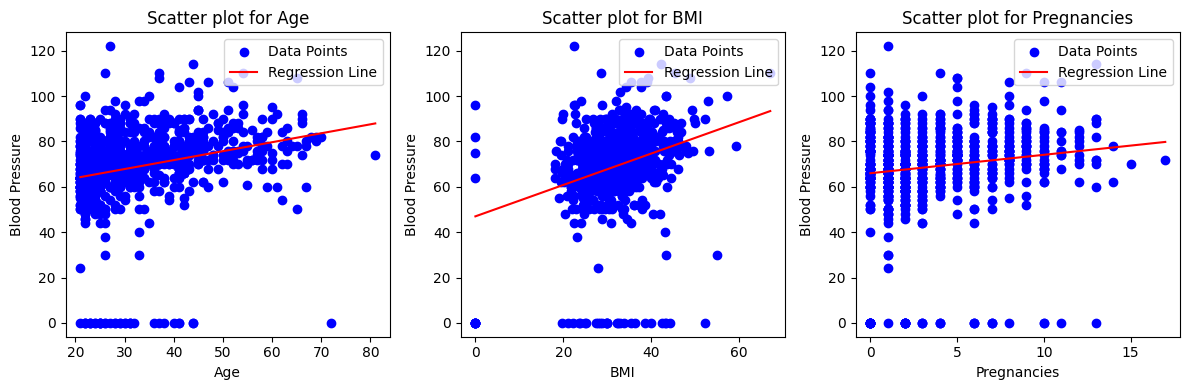

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

for i, feauture in enumerate(feauture_columns):

  X = df[[feauture]]
  linear_model = LinearRegression()
  linear_model.fit(X, df[['BloodPressure']])

  X_range = np.linspace(X.min(), X.max(), 100)
  y_pred = linear_model.predict(X_range)

  axes[i].scatter(df[feauture], df['BloodPressure'], color='blue', label='Data Points')
  axes[i].plot(X_range, y_pred, color='red', label='Regression Line')
  axes[i].set_xlabel(feauture)
  axes[i].set_ylabel('Blood Pressure')
  axes[i].set_title(f'Scatter plot for {feauture}')
  axes[i].legend(loc='upper right')

plt.tight_layout()
plt.show()